# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Despite boarding being the u...
1,"Not Verified | Flight cancelled, no crew! 9th..."
2,"Not Verified | The worst service ever, my bag..."
3,✅ Trip Verified | 4/4 flights we booked this ...
4,✅ Trip Verified | British Airways has a total...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Cleaning Data

In [5]:
import re

df.reviews = df.reviews.str.split('|',expand=True)[1]

# Function to clean the text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['cleaned reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,cleaned reviews
0,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...
1,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...
2,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...
3,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed a...
4,British Airways has a total lack of respect ...,British Airways has a total lack of respect f...


In [6]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VickTan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VickTan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VickTan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VickTan\AppData\Roaming\nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VickTan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
df['tagged POS'] = df['cleaned reviews'].apply(token_stop_pos)

In [9]:
df.head()

,reviews,cleaned reviews,tagged POS
0,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (..."
1,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ..."
2,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage..."
3,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed a...,"[(flights, n), (booked, v), (holiday, n), (del..."
4,British Airways has a total lack of respect ...,British Airways has a total lack of respect f...,"[(British, a), (Airways, n), (total, a), (lack..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [11]:
df['Lemma'] = df['tagged POS'].apply(lemmatize)
df.head()

,reviews,cleaned reviews,tagged POS,Lemma
0,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...
1,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...
2,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage...",bad service ever baggage arrive time flight ...
3,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed a...,"[(flights, n), (booked, v), (holiday, n), (del...",flight book holiday delay hour wifi availabl...
4,British Airways has a total lack of respect ...,British Airways has a total lack of respect f...,"[(British, a), (Airways, n), (total, a), (lack...",British Airways total lack respect customer ...


# Sentiment Analysis

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
df.head()

,reviews,cleaned reviews,tagged POS,Lemma,Sentiment
0,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...,0.9627
1,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...,-0.8834
2,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage...",bad service ever baggage arrive time flight ...,-0.8519
3,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed a...,"[(flights, n), (booked, v), (holiday, n), (del...",flight book holiday delay hour wifi availabl...,0.4404
4,British Airways has a total lack of respect ...,British Airways has a total lack of respect f...,"[(British, a), (Airways, n), (total, a), (lack...",British Airways total lack respect customer ...,0.7134


In [13]:
df['Sentiment'].describe

<bound method NDFrame.describe of 0       0.9627
1      -0.8834
2      -0.8519
3       0.4404
4       0.7134
         ...  
2995    0.0000
2996    0.0000
2997    0.0000
2998    0.0000
2999    0.0000
Name: Sentiment, Length: 3000, dtype: float64>

c:\Users\VickTan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Sentiment Score Distirbution')

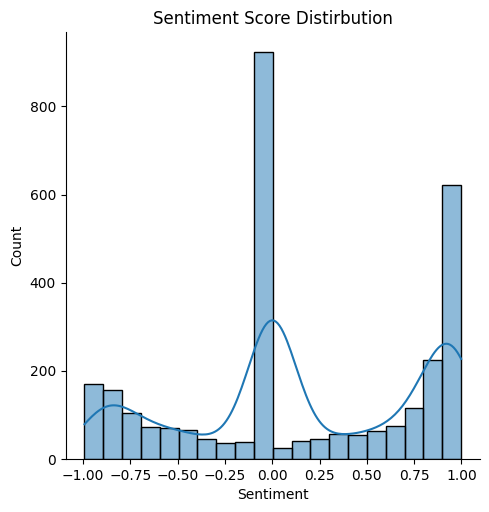

In [14]:
sns.displot(df['Sentiment'], kde=True, bins=20)
plt.title('Sentiment Score Distirbution')

In [15]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    else:
        return 'Negative'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,cleaned reviews,tagged POS,Lemma,Sentiment,Analysis
0,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...,0.9627,Positive
1,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...,-0.8834,Negative
2,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage...",bad service ever baggage arrive time flight ...,-0.8519,Negative
3,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed a...,"[(flights, n), (booked, v), (holiday, n), (del...",flight book holiday delay hour wifi availabl...,0.4404,Negative
4,British Airways has a total lack of respect ...,British Airways has a total lack of respect f...,"[(British, a), (Airways, n), (total, a), (lack...",British Airways total lack respect customer ...,0.7134,Positive


In [16]:
result = df['Analysis'].value_counts()
result

Analysis
Negative    1900
Positive    1100
Name: count, dtype: int64

Text(0.5, 1.0, 'Review Result')

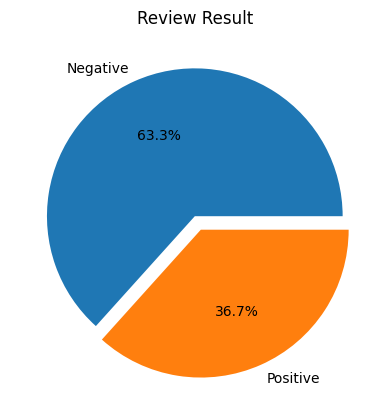

In [17]:
plt.pie(result.values, labels=result.index, autopct='%1.1f%%', explode=(0,0.1))
plt.title('Review Result')

# Wordcloud

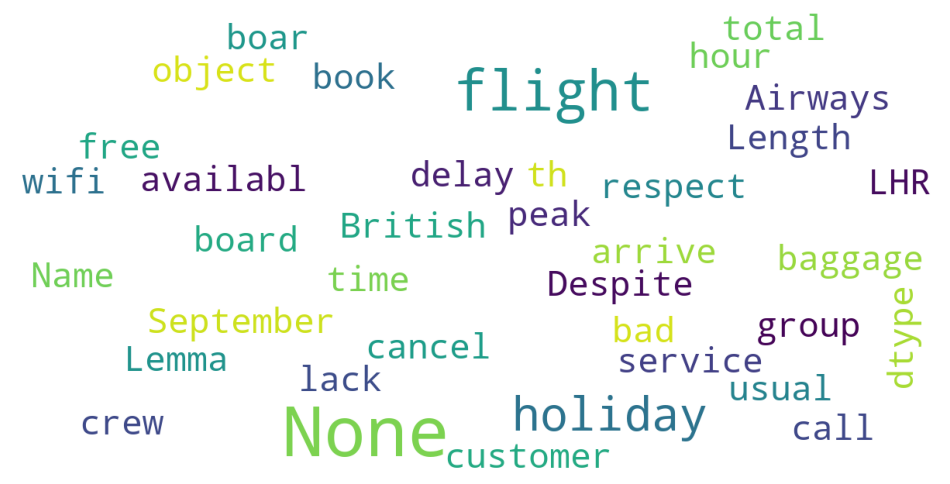

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# Words Frequency

In [28]:
text = " ".join(df['Lemma'])
text = text.lower()

In [29]:
words = text.split()
word_freq = Counter(words)

In [32]:
top_n = 20  # Select the top 20 words
top_words, top_freqs = zip(*word_freq.most_common(top_n))

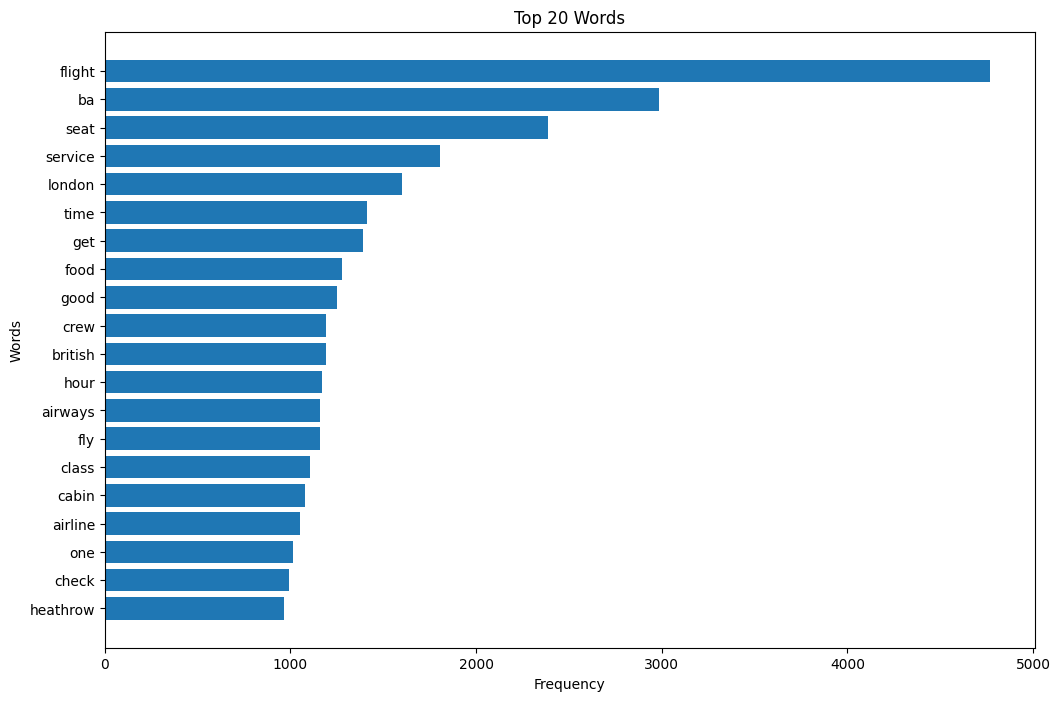

In [34]:
plt.figure(figsize=(12, 8))
plt.barh(top_words, top_freqs)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top {} Words".format(top_n))
plt.gca().invert_yaxis() 
plt.show()